In [1]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from scipy import stats
import statsmodels.api as sm
import scikit_posthocs as spp
import statistics as st

In [2]:
data = pd.read_csv("data5.csv")
data = data.drop(range(299,324))
for i in range(299):
    data.at[i,'Unnamed: 16'] = float(data.at[i,'Unnamed: 16'])
data = data.loc[data['Unnamed: 16'] > 0]
data = data.drop(0)
data = data.reset_index()
data = data.drop(['Unnamed: 17','index','Рекомендация Никиты','Unnamed: 16','Зачёт','Unnamed: 21'],axis=1)
data = data.drop(data.columns[4],axis=1)
data = data.drop(data.columns[15],axis=1)
data = data.rename(columns={'Unnamed: 1':'Факультет',
 '22.02.':'1',
 '01.03.':'2',
 '15.03.':'3',
 '22.03.':'4',
 '29.03.':'5',
 '05.04.':'6',
 '12.04.':'7',
 '19.04.':'8','26.04.':'9','03.05.':'10','10.05.':'11'})
data.insert(15,"Посещения", 0.0)
for i in range(207):
    if data.at[i,'3'] == '1': 
        data.at[i,'3'] = 1.0
    if data.at[i,'3'] != 1: 
        data.at[i,'3'] = 0.0
    if data.at[i,'1'] != 1: 
        data.at[i,'1'] = 0.0
    if data.at[i,'2'] != 1.0:
        data.at[i,'2'] = 0
    if data.at[i,'4'] == '1':
        data.at[i,'4'] = 1.0
    if data.at[i,'4'] != 1:
        data.at[i,'4'] = 0.0
    if data.at[i,'5'] != 1.0:
        data.at[i,'5'] = 0
    if data.at[i,'6'] != 1.0:
        data.at[i,'6'] = 0
    if data.at[i,'7'] != 1.0:
        data.at[i,'7'] = 0
    if data.at[i,'8'] == '1':
        data.at[i,'8'] = 1.0
    if data.at[i,'8'] != 1.0:
        data.at[i,'8'] = 0
    if data.at[i,'9'] != 1.0:
        data.at[i,'9'] = 0
    if data.at[i,'10'] != 1.0:
        data.at[i,'10'] = 0
    if data.at[i,'11'] == '1':
        data.at[i,'11'] = 1.0
    if data.at[i,'11'] != 1.0:
        data.at[i,'11'] = 0.0
    data.at[i, 'Посещения'] = data.at[i, '1'] + data.at[i, '2'] + data.at[i, '3'] + data.at[i, '4'] + data.at[i, '5'] + data.at[i, '6'] + data.at[i, '7'] + data.at[i, '8'] + data.at[i, '9'] + data.at[i, '10'] + data.at[i, '11']

data.insert(16, "П1", 0.0)
data.insert(17, "П2", 0.0)
data.insert(18, "П5", 0.0)
data.insert(19, "П10", 0.0)

for i in range(207):
    data.at[i,'П10'] = data.at[i,'Посещения'] - data.at[i,'1']
    v = 0
    for j in range(1,6):
        v += data.at[i,str(j)]
    data.at[i,'П1'] = v
    v = 0
    for j in range(6,11):
        v += data.at[i,str(j)]
    data.at[i,'П2'] = v
    data.at[i,'П5'] = data.at[i,'Посещения'] - data.at[i,'5']
#    data.at[i,'П7'] = data.at[i,'Посещения'] - data.at[i,'1']
#    data.at[i,'П5'] = data.at[i,'Посещения'] - data.at[i,'5']


data


,ФИО,Факультет,ВП,Курс,1,2,3,4,5,6,7,8,9,10,11,Посещения,П1,П2,П5,П10
0,Абдул Гани Надим Ахмадович,вмик,магистр,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,10.0,5.0,4.0,9.0,9.0
1,Абдуллина Маргарита Альбертовна,физ,специалист,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,8.0,2.0,5.0,8.0,8.0
2,Абеленцев Марк Артурович,физ,специалист,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,3.0,0.0,3.0,2.0
3,Андреевский Никита Эрнестович,хим,специалист,2.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,5.0,4.0,1.0,4.0,4.0
4,Анисимов Николай Петрович,физ,магистр,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,6.0,3.0,3.0,5.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202,Шляхова Анастасия Сергеевна,психол,специалист,4.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,6.0,4.0,2.0,5.0,5.0
203,Шупта Андрей Юрьевич,хим,специалист,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
204,Щелокова Елизавета Игоревна,экон,бакалавр,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,10.0,5.0,5.0,9.0,9.0
205,Юзбашян Айша Артуровна,экон,бакалавр,3.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,6.0,4.0,2.0,5.0,6.0


In [3]:
dataN6 = data.loc[data['Посещения'] >=6 ]
dataN6 = dataN6.reset_index()
dataN6 = dataN6.drop('index',axis = 1)
dataN6

,ФИО,Факультет,ВП,Курс,1,2,3,4,5,6,7,8,9,10,11,Посещения,П1,П2,П5,П10
0,Абдул Гани Надим Ахмадович,вмик,магистр,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,10.0,5.0,4.0,9.0,9.0
1,Абдуллина Маргарита Альбертовна,физ,специалист,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,8.0,2.0,5.0,8.0,8.0
2,Анисимов Николай Петрович,физ,магистр,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,6.0,3.0,3.0,5.0,5.0
3,Анучина Анжелика Геннадьевна,фмп,бакалавр,3.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,6.0,3.0,3.0,6.0,5.0
4,Артюшкова Анастасия Романовна,ффм,специалист,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,8.0,5.0,2.0,7.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135,Чушкина Карина Александровна,био,бакалавр,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,7.0,4.0,3.0,6.0,6.0
136,Шелухин Роман Вадимович,геол,бакалавр,3.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,7.0,5.0,2.0,6.0,6.0
137,Шляхова Анастасия Сергеевна,психол,специалист,4.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,6.0,4.0,2.0,5.0,5.0
138,Щелокова Елизавета Игоревна,экон,бакалавр,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,10.0,5.0,5.0,9.0,9.0


# Проверка независимости

In [4]:
crosstab = pd.crosstab(data["П1"], data["П2"])
crosstab

П2,0.0,1.0,2.0,3.0,4.0,5.0
П1,,,,,,
0.0,0,2,1,0,0,1
1.0,22,2,1,0,4,2
2.0,6,5,3,5,6,5
3.0,3,3,6,12,14,5
4.0,1,6,9,13,16,7
5.0,1,1,3,12,10,20


In [5]:
stats.chi2_contingency(crosstab)

Chi2ContingencyResult(statistic=125.0791661530102, pvalue=2.788576603822302e-15, dof=25, expected_freq=array([[ 0.63768116,  0.36714976,  0.44444444,  0.8115942 ,  0.96618357,
         0.77294686],
       [ 4.94202899,  2.84541063,  3.44444444,  6.28985507,  7.48792271,
         5.99033816],
       [ 4.7826087 ,  2.75362319,  3.33333333,  6.08695652,  7.24637681,
         5.79710145],
       [ 6.85507246,  3.9468599 ,  4.77777778,  8.72463768, 10.38647343,
         8.30917874],
       [ 8.28985507,  4.77294686,  5.77777778, 10.55072464, 12.56038647,
        10.04830918],
       [ 7.49275362,  4.31400966,  5.22222222,  9.53623188, 11.352657  ,
         9.0821256 ]]))

Они зависимы

# Проверка зависимости от посещения первой пары

In [6]:
crosstab1 = pd.crosstab(data["1"], data["П10"])
crosstab1

П10,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0
1,,,,,,,,,,,
0.0,0,12,5,8,2,10,11,15,17,0,2
1.0,12,4,1,3,10,13,19,25,16,19,3


In [7]:
stats.chi2_contingency(crosstab1)

Chi2ContingencyResult(statistic=43.47114745011087, pvalue=4.095353029123369e-06, dof=10, expected_freq=array([[ 4.75362319,  6.33816425,  2.37681159,  4.35748792,  4.75362319,
         9.11111111, 11.88405797, 15.84541063, 13.07246377,  7.52657005,
         1.98067633],
       [ 7.24637681,  9.66183575,  3.62318841,  6.64251208,  7.24637681,
        13.88888889, 18.11594203, 24.15458937, 19.92753623, 11.47342995,
         3.01932367]]))

# Проверка независимости от посещения 5 пары

In [8]:
crosstab2 = pd.crosstab(data["5"], data["П5"])
crosstab2

П5,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0
5,,,,,,,,,,
0.0,24,8,7,3,8,11,13,11,1,0
1.0,1,2,2,12,13,21,31,15,21,3


In [9]:
stats.chi2_contingency(crosstab2)

Chi2ContingencyResult(statistic=62.27663070556678, pvalue=4.871152796563196e-10, dof=9, expected_freq=array([[10.38647343,  4.15458937,  3.73913043,  6.23188406,  8.72463768,
        13.29468599, 18.28019324, 10.80193237,  9.14009662,  1.24637681],
       [14.61352657,  5.84541063,  5.26086957,  8.76811594, 12.27536232,
        18.70531401, 25.71980676, 15.19806763, 12.85990338,  1.75362319]]))

# Проверка независмости от посещения 5 и 6 пары

In [10]:
crosstab3 = pd.crosstab(data['5'],data['6'])
crosstab3

6,0.0,1.0
5,,
0.0,54,32
1.0,32,89


In [11]:
stats.chi2_contingency(crosstab3)

Chi2ContingencyResult(statistic=25.8668904088288, pvalue=3.657898490268258e-07, dof=1, expected_freq=array([[35.7294686, 50.2705314],
       [50.2705314, 70.7294686]]))

# Изучение посещаемости пар в конкретные дни

In [12]:
for i in range (1,12):
    print('кол-во посещений', i, ' пары: ', data[str(i)].sum())

кол-во посещений 1  пары:  125.0
кол-во посещений 2  пары:  138.0
кол-во посещений 3  пары:  141.0
кол-во посещений 4  пары:  138.0
кол-во посещений 5  пары:  121.0
кол-во посещений 6  пары:  121.0
кол-во посещений 7  пары:  118.0
кол-во посещений 8  пары:  134.0
кол-во посещений 9  пары:  120.0
кол-во посещений 10  пары:  98.0
кол-во посещений 11  пары:  40.0


In [13]:
for i in range (1,12):
    print('кол-во посетивших ', i, ' пар ', len(data.loc[data['Посещения'] == i]))

кол-во посетивших  1  пар  24
кол-во посетивших  2  пар  9
кол-во посетивших  3  пар  9
кол-во посетивших  4  пар  5
кол-во посетивших  5  пар  20
кол-во посетивших  6  пар  24
кол-во посетивших  7  пар  34
кол-во посетивших  8  пар  42
кол-во посетивших  9  пар  16
кол-во посетивших  10  пар  21
кол-во посетивших  11  пар  3


In [14]:
sum = 0
for i in range (1, 6):
    sum += len(data.loc[data['Посещения'] == i])
print('кол-во посетивших меньше 6 паp:', sum)
sum = 0
for i in range (6, 10):
    sum += len(data.loc[data['Посещения'] == i])
print('кол-во посетивших больше 6 паp:', sum)

кол-во посетивших меньше 6 паp: 67
кол-во посетивших больше 6 паp: 116


(array([24.,  0.,  9.,  0.,  9.,  0.,  5.,  0., 20.,  0.,  0., 24.,  0.,
        34.,  0., 42.,  0., 16.,  0., 21.,  0.,  3.]),
 array([ 1.        ,  1.45454545,  1.90909091,  2.36363636,  2.81818182,
         3.27272727,  3.72727273,  4.18181818,  4.63636364,  5.09090909,
         5.54545455,  6.        ,  6.45454545,  6.90909091,  7.36363636,
         7.81818182,  8.27272727,  8.72727273,  9.18181818,  9.63636364,
        10.09090909, 10.54545455, 11.        ]),
 <BarContainer object of 22 artists>)

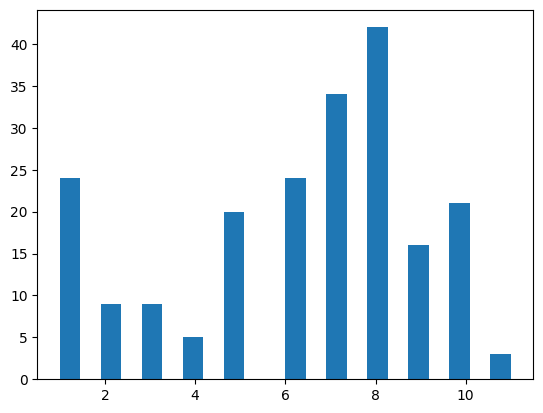

In [15]:
plt.hist(data['Посещения'],bins=22)

In [16]:
fak = set(data['Факультет'])
fak = list(fak)
def Average(lst):
    return sum(lst) / len(lst)
for i in range(0,len(fak)):
    print('Количество ',fak[i], ' равно', len(data.loc[data['Факультет'] == fak[i]]),
          ' Их среднее:', round(data.loc[data['Факультет'] == fak[i]]['Посещения'].mean(),1), '   Их отклонение:', 
          round(data.loc[data['Факультет'] == fak[i]]['Посещения'].std(),1))
d1 = data.loc[data['Факультет'] == 'геол']['Посещения'].mean()
d1
#round(Average(list(data.loc[data['Факультет'] == fak[i]]['Посещения'])),1)

Количество  фмп  равно 2  Их среднее: 5.0    Их отклонение: 1.4
Количество  фгу  равно 2  Их среднее: 8.0    Их отклонение: 1.4
Количество  ИСАА  равно 8  Их среднее: 3.4    Их отклонение: 3.1
Количество  био  равно 19  Их среднее: 6.3    Их отклонение: 2.6
Количество  Полит.  равно 2  Их среднее: 6.0    Их отклонение: 1.4
Количество  физ  равно 19  Их среднее: 6.6    Их отклонение: 2.4
Количество  фи  равно 1  Их среднее: 8.0    Их отклонение: nan
Количество  ин.б  равно 1  Их среднее: 1.0    Их отклонение: nan
Количество  вмик  равно 15  Их среднее: 7.7    Их отклонение: 2.3
Количество  ффм  равно 2  Их среднее: 6.5    Их отклонение: 2.1
Количество  вшп  равно 8  Их среднее: 4.4    Их отклонение: 2.7
Количество  уи  равно 1  Их среднее: 10.0    Их отклонение: nan
Количество  психол  равно 8  Их среднее: 5.5    Их отклонение: 3.9
Количество  экон  равно 17  Их среднее: 6.5    Их отклонение: 2.9
Количество  вшт  равно 2  Их среднее: 5.0    Их отклонение: 0.0
Количество  ист  равно 14  

7.2

In [17]:
dataSpec = data.loc[data['ВП'] == "специалист"]
dataMagistr = data.loc[data['ВП'] == "магистр"]
dataBakalavr = data.loc[data['ВП'] == "бакалавр"]
print('Количеситво Бакалавров:', len(dataBakalavr))
print('среднее:', dataBakalavr['Посещения'].mean(),'  отклонение:',st.stdev(dataBakalavr['Посещения'],dataBakalavr['Посещения'].mean()))
print('Количеситво Магистров:', len(dataMagistr))
print('среднее:', dataMagistr['Посещения'].mean(),'  отклонение:',st.stdev(dataMagistr['Посещения'],dataMagistr['Посещения'].mean()))
print('Количеситво Специалистов:', len(dataSpec))
print('среднее:', dataSpec['Посещения'].mean(),'  отклонение:',st.stdev(dataSpec['Посещения'],dataSpec['Посещения'].mean()))

Количеситво Бакалавров: 76
среднее: 6.184210526315789   отклонение: 3.0841985509617222
Количеситво Магистров: 81
среднее: 6.419753086419753   отклонение: 2.4282925973349268
Количеситво Специалистов: 50
среднее: 6.08   отклонение: 2.926584691954715


(array([11.,  6.,  1.,  2.,  5.,  8., 13., 11.,  8.,  9.,  2.]),
 array([ 1.        ,  1.90909091,  2.81818182,  3.72727273,  4.63636364,
         5.54545455,  6.45454545,  7.36363636,  8.27272727,  9.18181818,
        10.09090909, 11.        ]),
 <BarContainer object of 11 artists>)

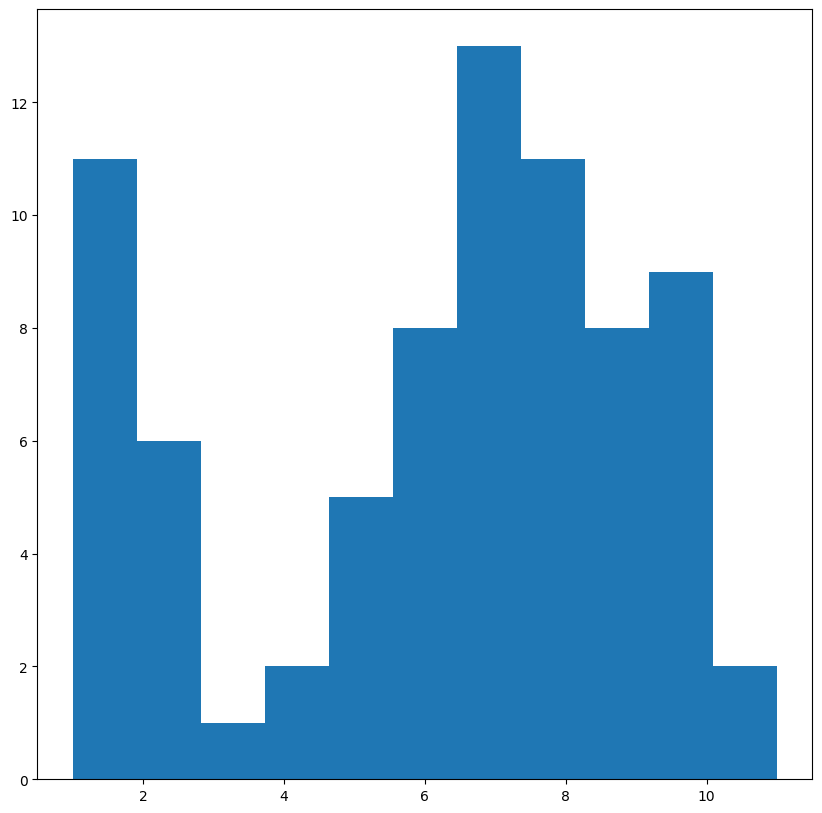

In [38]:
plt.hist(dataBakalavr['Посещения'], bins = 11)

In [19]:
dataBakalavr['Посещения'].mean()

6.184210526315789

In [20]:
dataBakalavr['Посещения'].var()

9.512280701754385

(array([ 8.,  0.,  0.,  0.,  4.,  0.,  0.,  0.,  6.,  0.,  5.,  0.,  7.,
         0., 12.,  0.,  2.,  0.,  5.,  1.]),
 array([ 1. ,  1.5,  2. ,  2.5,  3. ,  3.5,  4. ,  4.5,  5. ,  5.5,  6. ,
         6.5,  7. ,  7.5,  8. ,  8.5,  9. ,  9.5, 10. , 10.5, 11. ]),
 <BarContainer object of 20 artists>)

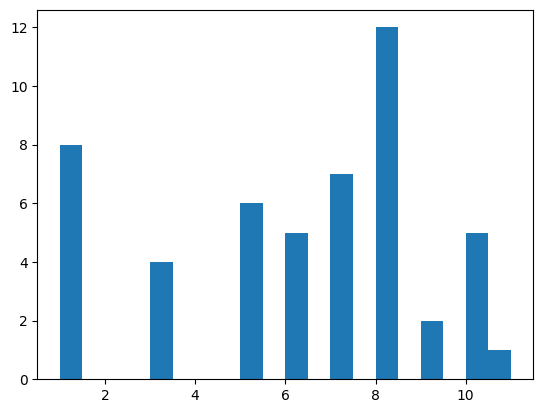

In [21]:
plt.hist(dataSpec['Посещения'], bins = 20)

In [22]:
dataSpec['Посещения'].mean()

6.08

In [23]:
dataSpec['Посещения'].var()

8.564897959183673

(array([ 5.,  0.,  3.,  0.,  4.,  0.,  3.,  0.,  9.,  0.,  0., 11.,  0.,
        14.,  0., 19.,  0.,  6.,  0.,  7.]),
 array([ 1.  ,  1.45,  1.9 ,  2.35,  2.8 ,  3.25,  3.7 ,  4.15,  4.6 ,
         5.05,  5.5 ,  5.95,  6.4 ,  6.85,  7.3 ,  7.75,  8.2 ,  8.65,
         9.1 ,  9.55, 10.  ]),
 <BarContainer object of 20 artists>)

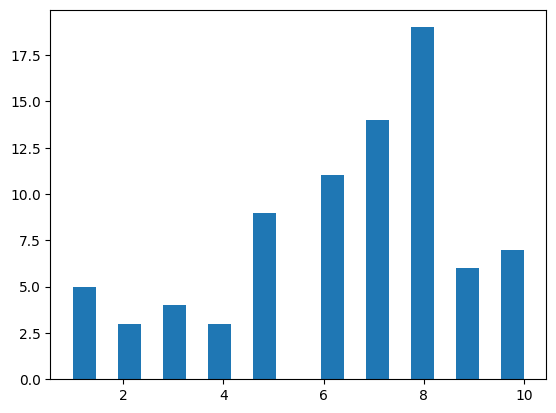

In [24]:
plt.hist(dataMagistr['Посещения'], bins = 20)

In [25]:
dataMagistr['Посещения'].mean()

6.419753086419753

In [26]:
dataMagistr['Посещения'].var()

5.896604938271606

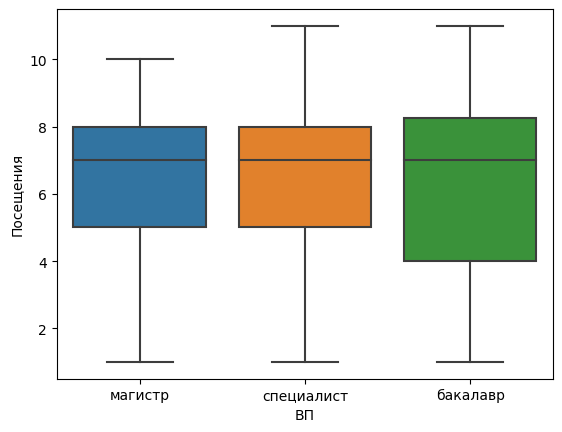

In [27]:
sns.boxplot( y=data['Посещения'], x=data['ВП'] );
plt.show()

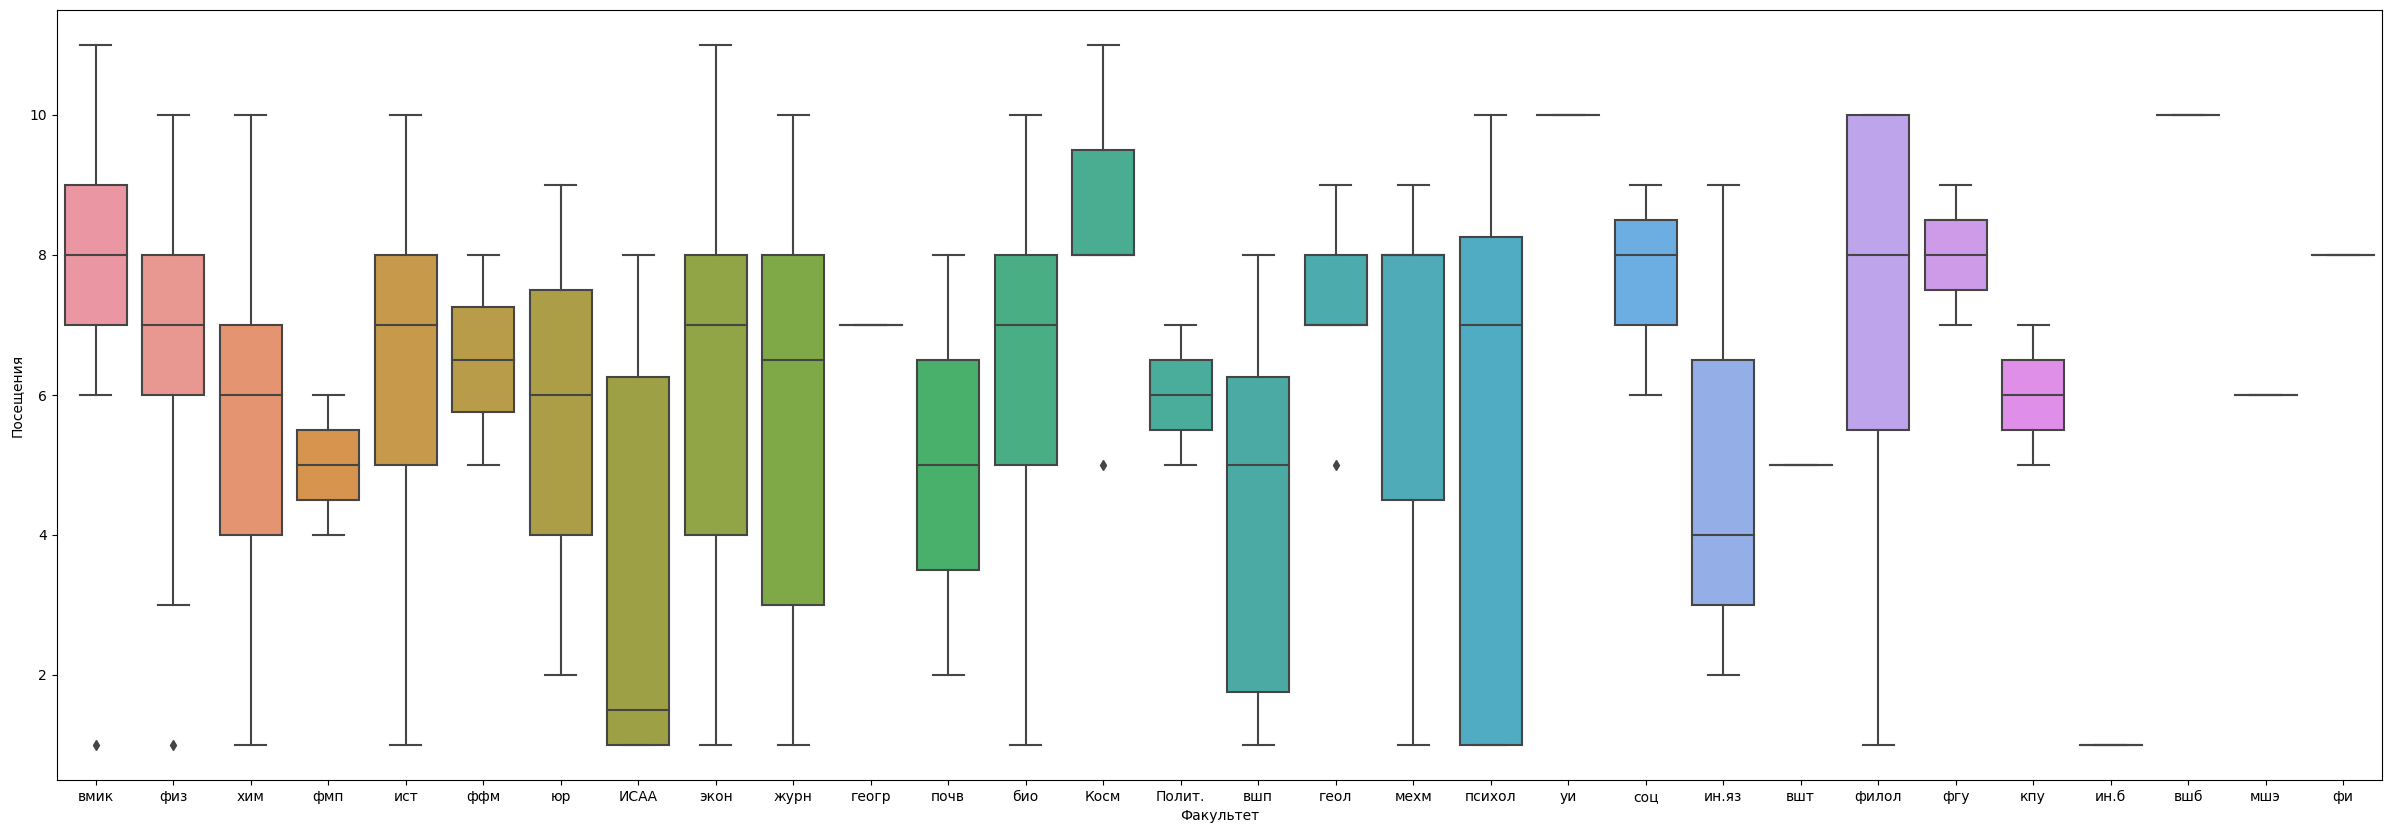

In [29]:
sns.boxplot( y=data['Посещения'], x=data['Факультет'] );
plt.rcParams['figure.figsize'] = [30, 10]
plt.show()

# Анализ людей посетивших нужное количство пар для зачёта

(array([24.,  0.,  0.,  0.,  0.,  0., 34.,  0.,  0.,  0.,  0.,  0., 42.,
         0.,  0.,  0.,  0.,  0., 16.,  0.,  0.,  0.,  0.,  0., 21.,  0.,
         0.,  0.,  0.,  3.]),
 array([ 6.        ,  6.16666667,  6.33333333,  6.5       ,  6.66666667,
         6.83333333,  7.        ,  7.16666667,  7.33333333,  7.5       ,
         7.66666667,  7.83333333,  8.        ,  8.16666667,  8.33333333,
         8.5       ,  8.66666667,  8.83333333,  9.        ,  9.16666667,
         9.33333333,  9.5       ,  9.66666667,  9.83333333, 10.        ,
        10.16666667, 10.33333333, 10.5       , 10.66666667, 10.83333333,
        11.        ]),
 <BarContainer object of 30 artists>)

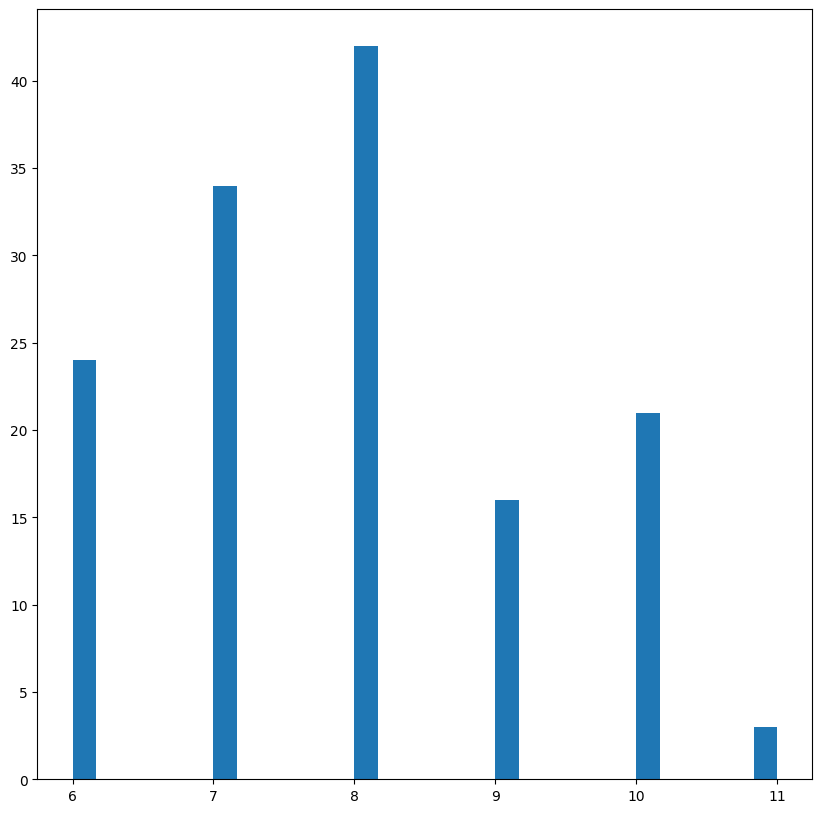

In [36]:
plt.rcParams['figure.figsize'] = [10, 10]
plt.hist(dataN6['Посещения'],bins=30)

In [34]:
stats.shapiro(dataN6['Посещения'])

ShapiroResult(statistic=0.9119613170623779, pvalue=1.5089484861618985e-07)